In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [ ]:
def normal_den(x):
  return (1/mt.sqrt(2*mt.pi))*(mt.exp(-.5*(x**2)))

Agrega punto medio, asi se tienen tres puntos para x_1, x_2,x_3
Respectivamente se tiene f(x_1),f(x_2),f(x_3)


Interpolar los puntos x_q, f(x_q)


In [ ]:
def lagrange_basis(x, idx, x_at):
  res   = 1
  for i,j in enumerate(x):
    if idx != i:
      res *= (x_at - j)/(x[idx] - j)
  return res

def lagrange(x, y, x_at):
  px = 0
  p=[]
  for i,j in enumerate(y):
    px += j*lagrange_basis(x, i, x_at)
    
  return px
	

In [ ]:
def parte(v1,v2):
  P=[]
  if v1<v2:
   for i in range(v1,v2):
    P.append([i,i+.25,i+.5])
    P.append([i+.5,i+.75,i+1])
  else:
    for i in range(v2,v1):
      P.append([i,i+.25,i+.5])
      P.append([i+.5,i+.75,i+1])
  return P


*   $P(x)=x^2A+xB+C=px $
*   $P(0)=C=px_0$
*   $P(1)= A+B+C=px_1$
*   $P(-1)= A-B+C=px_{-1}$
*   $P(1)+P(-1)=A+B+C+A-B+C=2A+2C$
  * $A=(P(1)+P(-1))*.5-C$
  * $B=P(1)-A-C$
  * $C=P(0)$




In [ ]:
def coeficientes(u,v,f=lagrange):
  #u= [x_1,x_2,x_3], v=[x_1, x_2,x_3]
  c=lagrange(u,v,0)
  a=(lagrange(u,v,1)+ lagrange(u,v,(-1)))/2-c
  b=lagrange(u,v,1)-a-c
  return a,b,c


def calcula_integral(v1,v2,f=normal_den):
  x=[]
  k=0
  P=parte(v1,v2)
  for i in P:
    x=i
    M=max(x)
    m=min(x)
    y=[f(i) for i in x]
    A,B,C=coeficientes(x,y)
    k  +=  (A * ( (M**3 - m**3)/3 )) +  (B*( (M**2 - m**2)/2 )) + C*(M-m)
  return k,P

In [ ]:
value,points=calcula_integral(-1,2)
print(value)

0.8186028506488197


In [ ]:

grid = [-1+.1*i for i in range(81)]
y_eval=[lagrange(x_coord,y_coord, i) for i in grid]




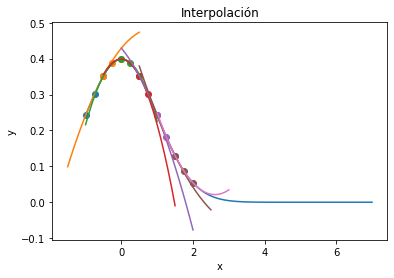

In [ ]:
plt.plot(grid,[normal_den(i)for i in grid])
for i in points:
  x_coord=i
  x_aux=[min(x_coord)-.5+.1*i for i in range(21)]
  y_coord=[normal_den(i) for i in x_coord]
  plt.scatter(x_coord,y_coord)
  y_eval=[lagrange(x_coord,y_coord, i) for i in grid]
  plt.plot(x_aux,[lagrange(x_coord,y_coord, i) for i in x_aux])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación')
plt.show()